# Fuzzy/Soft Matching With HDBSCAN

In [2]:
import pandas as pd
import numpy as np
import hdbscan
import matplotlib.pyplot as plt
%matplotlib inline
import umap.umap_ as umap
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [3]:
df = pd.read_csv('final_stg_targeting.csv', compression = 'gzip')
df.shape

(3300145, 14)

In [28]:
df.total_sec_spent_in_group_as_admin_in_past_week.max()

1887.8939998913002

In [29]:
df[df['total_sec_spent_in_group_as_admin_in_past_week']==0].shape

(3300142, 14)

In [4]:
df.head()

,userid,gender,age,days_since_confirmed,l28,country,city,num_groups_as_member,last_month_mcs,num_groups_as_moderator,num_groups_as_admin,invites_in_last_week,total_sec_spent_in_group_as_admin_in_past_week,stg_admin
0,1489122752,2,43.0,4490.0,28.0,1,25546,28.0,9.0,0.0,4.0,32.0,0.0,0
1,100009869861927,2,40.0,1981.0,28.0,5,2117,35.0,5.0,0.0,1.0,1.0,0.0,0
2,1193265876,2,45.0,4513.0,28.0,5,13218,40.0,7.0,0.0,2.0,0.0,0.0,0
3,100010690117819,2,43.0,1867.0,28.0,5,14286,80.0,13.0,0.0,1.0,24.0,0.0,0
4,1163320513,1,38.0,4675.0,26.0,5,28538,2419.0,5.0,0.0,24.0,33.0,0.0,0


In [18]:
clustering_df = df.drop(['country', 'city', 'stg_admin', 'num_groups_as_moderator', 'last_month_mcs'], axis = 1)

In [19]:
clustering_df.head()

,userid,gender,age,days_since_confirmed,l28,num_groups_as_member,num_groups_as_admin,invites_in_last_week,total_sec_spent_in_group_as_admin_in_past_week
0,1489122752,2,43.0,4490.0,28.0,28.0,4.0,32.0,0.0
1,100009869861927,2,40.0,1981.0,28.0,35.0,1.0,1.0,0.0
2,1193265876,2,45.0,4513.0,28.0,40.0,2.0,0.0,0.0
3,100010690117819,2,43.0,1867.0,28.0,80.0,1.0,24.0,0.0
4,1163320513,1,38.0,4675.0,26.0,2419.0,24.0,33.0,0.0


In [12]:
%%time
model = hdbscan.HDBSCAN(cluster_selection_method = 'leaf', min_cluster_size = 20000, prediction_data = True, min_samples = 1)
model.fit(clustering_df.drop('userid', axis = 1))

Wall time: 40min 2s


HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='leaf', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=20000, min_samples=1, p=None,
        prediction_data=True)

In [13]:
pd.DataFrame(model.labels_).iloc[:,0].value_counts()

-1    3004773
 2      63254
 1      59781
 6      44343
 0      43269
 4      31188
 3      29819
 5      23718
Name: 0, dtype: int64

In [14]:
clustering_df['cluster'] = model.labels_
clustering_df.head()

,userid,gender,age,days_since_confirmed,l28,num_groups_as_member,num_groups_as_admin,invites_in_last_week,cluster
0,1489122752,2,43.0,4490.0,28.0,28.0,4.0,32.0,-1
1,100009869861927,2,40.0,1981.0,28.0,35.0,1.0,1.0,0
2,1193265876,2,45.0,4513.0,28.0,40.0,2.0,0.0,6
3,100010690117819,2,43.0,1867.0,28.0,80.0,1.0,24.0,-1
4,1163320513,1,38.0,4675.0,26.0,2419.0,24.0,33.0,-1


In [16]:
clustering_df[~clustering_df['cluster']<0].to_csv('admin_clusters_7.csv', compression = 'gzip', index = False)

In [21]:
clustering_df.head()

,userid,gender,age,days_since_confirmed,l28,num_groups_as_member,num_groups_as_admin,invites_in_last_week,total_sec_spent_in_group_as_admin_in_past_week
0,1489122752,2,43.0,4490.0,28.0,28.0,4.0,32.0,0.0
1,100009869861927,2,40.0,1981.0,28.0,35.0,1.0,1.0,0.0
2,1193265876,2,45.0,4513.0,28.0,40.0,2.0,0.0,0.0
3,100010690117819,2,43.0,1867.0,28.0,80.0,1.0,24.0,0.0
4,1163320513,1,38.0,4675.0,26.0,2419.0,24.0,33.0,0.0


In [22]:
%%time
model = hdbscan.HDBSCAN(cluster_selection_method = 'leaf', min_cluster_size = 20000, prediction_data = True, min_samples = 1)
model.fit(clustering_df.drop('userid', axis = 1))

Wall time: 49min 11s


HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='leaf', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=20000, min_samples=1, p=None,
        prediction_data=True)

In [23]:
pd.DataFrame(model.labels_).iloc[:,0].value_counts()

-1    3029516
 1      62714
 2      56400
 3      37561
 4      34908
 5      30107
 0      26515
 6      22424
Name: 0, dtype: int64

In [24]:
clustering_df['cluster'] = model.labels_
clustering_df.head()

,userid,gender,age,days_since_confirmed,l28,num_groups_as_member,num_groups_as_admin,invites_in_last_week,total_sec_spent_in_group_as_admin_in_past_week,cluster
0,1489122752,2,43.0,4490.0,28.0,28.0,4.0,32.0,0.0,-1
1,100009869861927,2,40.0,1981.0,28.0,35.0,1.0,1.0,0.0,0
2,1193265876,2,45.0,4513.0,28.0,40.0,2.0,0.0,0.0,-1
3,100010690117819,2,43.0,1867.0,28.0,80.0,1.0,24.0,0.0,-1
4,1163320513,1,38.0,4675.0,26.0,2419.0,24.0,33.0,0.0,-1


In [25]:
clustering_df = clustering_df[~clustering_df['cluster']<0]
clustering_df.head()

,userid,gender,age,days_since_confirmed,l28,num_groups_as_member,num_groups_as_admin,invites_in_last_week,total_sec_spent_in_group_as_admin_in_past_week,cluster
1,100009869861927,2,40.0,1981.0,28.0,35.0,1.0,1.0,0.0,0
11,100004990998948,2,39.0,2252.0,0.0,2.0,1.0,0.0,0.0,3
13,1440411938,2,44.0,4315.0,28.0,14.0,1.0,1.0,0.0,6
21,100000048774043,2,40.0,4179.0,28.0,29.0,1.0,0.0,0.0,5
35,100000197997686,1,41.0,4130.0,28.0,44.0,3.0,2.0,0.0,5


In [26]:
clustering_df.shape

(270629, 10)

In [27]:
clustering_df.to_csv('admin_clusters_3.csv', compression= 'gzip', index = False)

In [33]:
soft_clusters = pd.DataFrame(hdbscan.all_points_membership_vectors(model))
soft_clusters.head()

,0,1,2
0,0.848417,0.007804,0.002484
1,0.922635,0.010591,0.003156
2,0.285536,0.003261,0.001038
3,0.374958,0.004264,0.001358
4,0.796801,0.007988,0.002544


In [8]:
%%time
model_2 = hdbscan.HDBSCAN(cluster_selection_method = 'leaf', min_cluster_size = 25000, prediction_data = True, min_samples = 1)
model_2.fit(clustering_df)

Wall time: 52min 41s


HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='leaf', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=25000, min_samples=1, p=None,
        prediction_data=True)

In [9]:
pd.DataFrame(model_2.labels_).iloc[:,0].value_counts()

-1    2879643
 5     202404
 1      62714
 2      56400
 3      37561
 4      34908
 0      26515
Name: 0, dtype: int64

In [6]:
%%time
model_3 = hdbscan.HDBSCAN(cluster_selection_method = 'leaf', min_cluster_size = 40000, prediction_data = True, min_samples = 1)
model_3.fit(clustering_df)

Wall time: 1h 2min 36s


HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='leaf', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=40000, min_samples=1, p=None,
        prediction_data=True)

In [7]:
pd.DataFrame(model_3.labels_).iloc[:,0].value_counts()

-1    2739646
 0     366699
 2     131086
 1      62714
Name: 0, dtype: int64

In [9]:
clustering_df['cluster'] = [x for x in model_3.labels_]
clustering_df = clustering_df[~clustering_df['cluster']<0]
clustering_df.head()

,gender,age,days_since_confirmed,l28,num_groups_as_member,num_groups_as_admin,invites_in_last_week,total_sec_spent_in_group_as_admin_in_past_week,cluster
2,2,45.0,4513.0,28.0,40.0,2.0,0.0,0.0,0
9,2,44.0,3803.0,28.0,14.0,2.0,0.0,0.0,0
11,2,39.0,2252.0,0.0,2.0,1.0,0.0,0.0,2
12,2,38.0,4914.0,28.0,93.0,4.0,2.0,0.0,0
13,2,44.0,4315.0,28.0,14.0,1.0,1.0,0.0,0


In [10]:
clustering_df.cluster.value_counts()

0    366699
2    131086
1     62714
Name: cluster, dtype: int64

In [12]:
clustering_df.to_csv('admin_clusters.csv', compression = 'gzip', index = False)

In [12]:
%%time
model_4 = hdbscan.HDBSCAN(cluster_selection_method = 'leaf', min_cluster_size = 80000, prediction_data = True, min_samples = 1)
model_4.fit(clustering_df)

Wall time: 54min 44s


HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='leaf', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=80000, min_samples=1, p=None,
        prediction_data=True)

In [13]:
pd.DataFrame(model_4.labels_).iloc[:,0].value_counts()

-1    2661466
 0     366699
 1     271980
Name: 0, dtype: int64

In [15]:
df['cluster'] = model_3.labels_

In [16]:
df.head()

,userid,gender,age,days_since_confirmed,l28,country,city,num_groups_as_member,last_month_mcs,num_groups_as_moderator,num_groups_as_admin,invites_in_last_week,total_sec_spent_in_group_as_admin_in_past_week,stg_admin,cluster
0,1489122752,2,43.0,4490.0,28.0,1,25546,28.0,9.0,0.0,4.0,32.0,0.0,0,-1
1,100009869861927,2,40.0,1981.0,28.0,5,2117,35.0,5.0,0.0,1.0,1.0,0.0,0,-1
2,1193265876,2,45.0,4513.0,28.0,5,13218,40.0,7.0,0.0,2.0,0.0,0.0,0,0
3,100010690117819,2,43.0,1867.0,28.0,5,14286,80.0,13.0,0.0,1.0,24.0,0.0,0,-1
4,1163320513,1,38.0,4675.0,26.0,5,28538,2419.0,5.0,0.0,24.0,33.0,0.0,0,-1


In [18]:
clusters = df[~df['cluster'] == -1]

In [27]:
clusters.to_csv('clusters.csv', compression = 'gzip')

In [26]:
reducer = umap.UMAP(n_neighbors = 30, n_components = 3, min_dist = 0, verbose = True)
umap_df = reducer.fit_transform(clusters.drop('cluster', axis = 1))

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0, n_components=3, n_epochs=None,
     n_neighbors=30, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=None, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=True)
Construct fuzzy simplicial set
Wed Jan  6 12:30:50 2021 Finding Nearest Neighbors
Wed Jan  6 12:30:50 2021 Building RP forest with 35 trees
Wed Jan  6 12:31:14 2021 NN descent for 18 iterations
	 0  /  18
	 1  /  18
Wed Jan  6 12:32:55 2021 Finished Nearest Neighbor Search


C:\Users\paperspace\AppData\Roaming\Python\Python37\site-packages\numba\np\ufunc\parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 11004. The TBB threading layer is disabled.
  warnings.warn(problem)


Wed Jan  6 12:33:27 2021 Construct embedding


C:\Users\paperspace\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


KeyboardInterrupt: 

In [ ]:
fig = px.scatter_3d(reduced_vectors_2, x='dim1', y='dim2', z='dim3', color='cluster')
fig.update_traces(marker=dict(size=4))
fig.show()

# KMeans Clustering

In [14]:
%%time
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 4):
    
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    
    kmeans.fit(clustering_df)
    
    wcss.append(kmeans.inertia_)

Wall time: 2min 28s


In [15]:
wcss

[8063119082086.054, 1946980989105.4119, 1193930240884.3157]

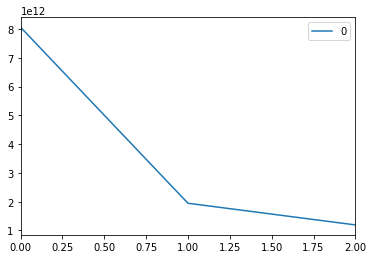

In [16]:
pd.DataFrame(wcss).plot()

Automatically created module for IPython interactive environment


KeyboardInterrupt: 

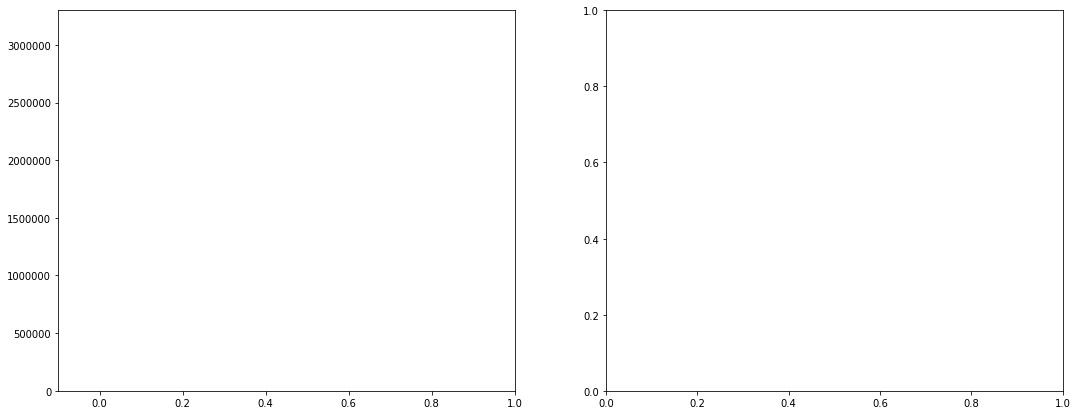

In [18]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

X = clustering_df.copy()


range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()
